# BMI Project 2 - English
This notebook is for assistance with the coding of some questions in the project.
The sections are marked with the corresponding question in the project description.
Remember, this code is provided to get started with the project, but the code is not complete for answering the corresponding questions.

#### Initialize Python Packages

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

#### Read Data

In [29]:
# Path to file (insert your own path)
file_path = 'Data/bmi2_data.csv'

# Load data
D = pd.read_csv(file_path,sep=';')
D

,id,bmi,age,fastfood
0,1,21.296296,44,0.0
1,2,21.545091,63,1.0
2,3,24.221453,69,1.0
3,4,26.122449,51,1.0
4,5,26.365603,68,6.0
...,...,...,...,...
842,843,26.296567,45,24.0
843,844,27.776911,45,24.0
844,845,22.343516,44,24.0
845,846,26.149277,48,6.0


#### Log transform

In [30]:
# Add log-transformed BMI
D['logbmi'] = np.log(D['bmi'])
D

,id,bmi,age,fastfood,logbmi
0,1,21.296296,44,0.0,3.058533
1,2,21.545091,63,1.0,3.070148
2,3,24.221453,69,1.0,3.187239
3,4,26.122449,51,1.0,3.262795
4,5,26.365603,68,6.0,3.272060
...,...,...,...,...,...
842,843,26.296567,45,24.0,3.269438
843,844,27.776911,45,24.0,3.324205
844,845,22.343516,44,24.0,3.106536
845,846,26.149277,48,6.0,3.263822


In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(D['logbmi'], D['age'], alpha=0.5) 
plt.title('Scatter Plot of log(BMI) and Age')
plt.xlabel('log(BMI)')
plt.ylabel('Age')

plt.savefig('Figures/scatter_plot_1.png')  
plt.close()


In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(D['logbmi'], D['fastfood'], alpha=0.5)  # Adjust visual parameters as needed
plt.title('Scatter Plot of log(BMI) and Fastfood')
plt.xlabel('log(BMI)')
plt.ylabel('Age')

# Save the plot to a file in your desired folder
plt.savefig('Figures/scatter_plot_2.png')  # Adjust the path and file name as needed
plt.close()

In [33]:
# Converting specific columns to numpy array
logbmi_array = D['logbmi'].to_numpy()
age_array = D['age'].to_numpy()
fastfood_array = D['fastfood'].to_numpy()


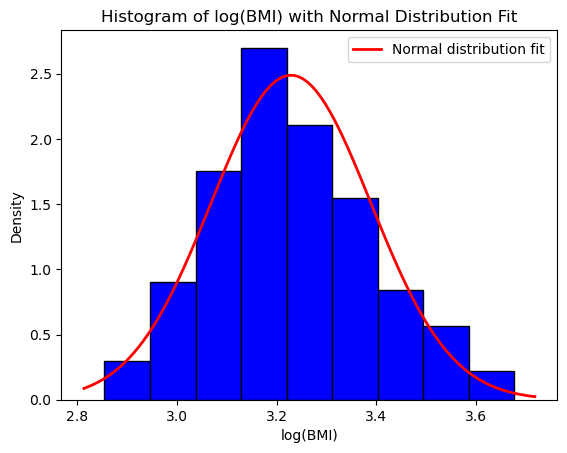

In [34]:


# Example DataFrame 'D' and 'logbmi' column
# Assuming 'D' is your DataFrame and 'logbmi' is already a column in it

# Drop missing values and plot histogram
plt.hist(D['logbmi'].dropna(), bins=9, density=True, color='blue', edgecolor='black')

# Fit a normal distribution to the data
mu, std = stats.norm.fit(D['logbmi'].dropna())

# Generate points for the normal distribution curve
xmin, xmax = plt.xlim()  # Get the current x-axis limits
x = np.linspace(xmin, xmax, 100)  # Generate 100 points between the min and max x values
p = stats.norm.pdf(x, mu, std)  # Get the normal probability density function values

# Plot the fitted normal distribution curve (in red)
plt.plot(x, p, 'r', linewidth=2, label='Normal distribution fit')

# Add labels and title
plt.title('Histogram of log(BMI) with Normal Distribution Fit')
plt.xlabel('log(BMI)')
plt.ylabel('Density')

# Add legend
plt.legend()



# Show the plot
plt.show()


Saved figure to logbmi_combined_histogram_boxplot.png


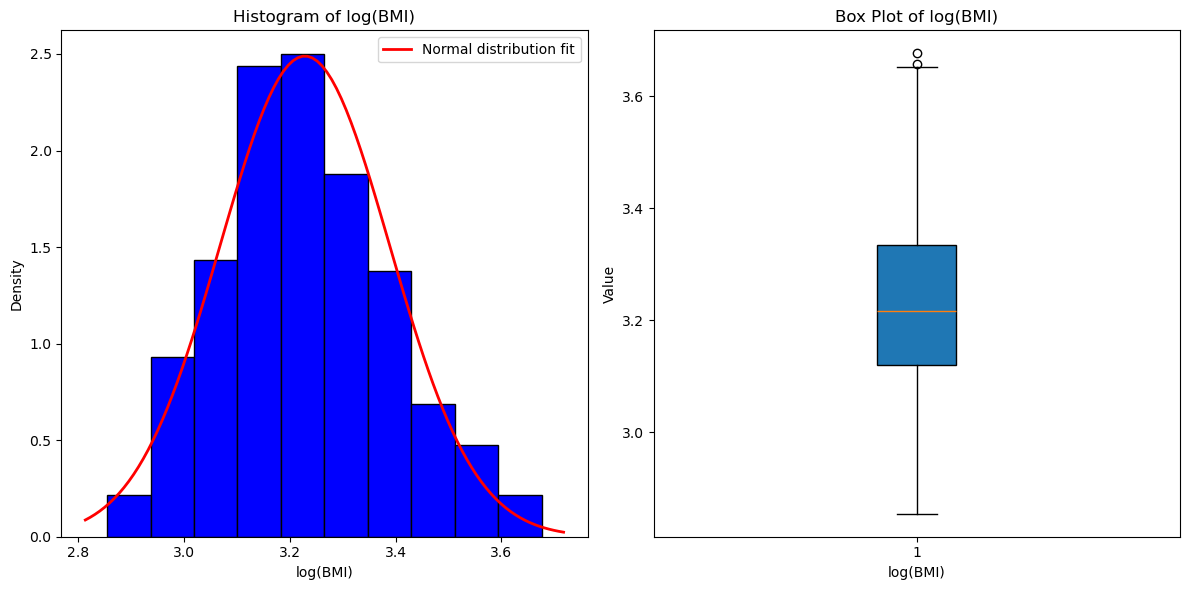

Saved figure to age_combined_histogram_boxplot.png


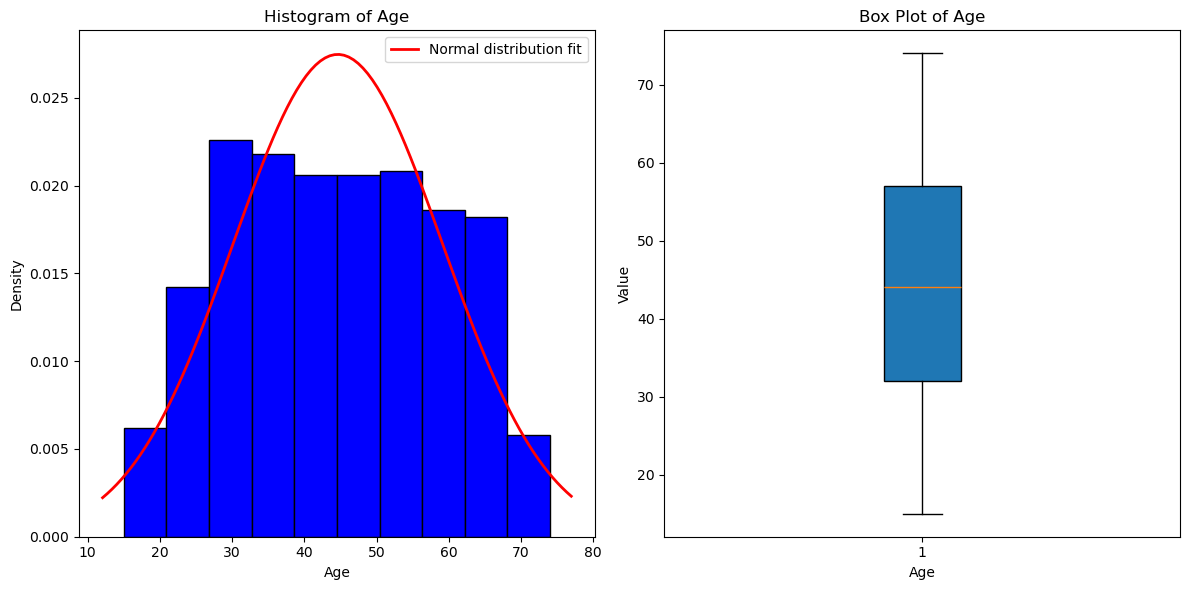

Saved figure to fastfood_combined_histogram_boxplot.png


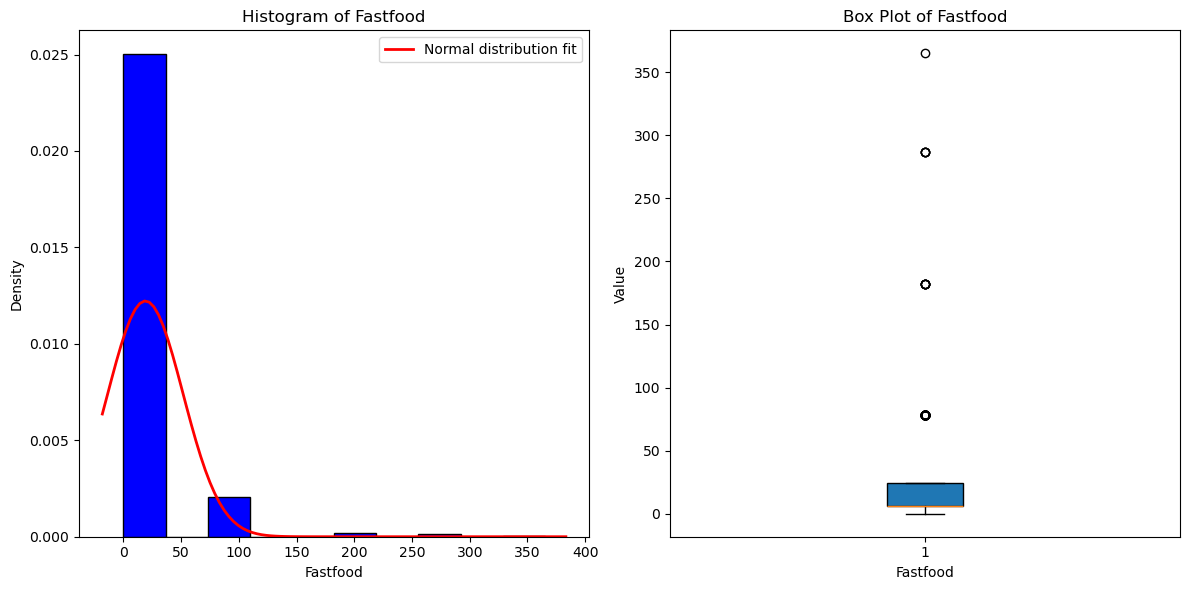

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Define the titles and data arrays
titles = ['log(BMI)', 'Age', 'Fastfood']
data_arrays = [logbmi_array, age_array, fastfood_array]

# Iterate over each data array and title
for title, data in zip(titles, data_arrays):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

    # Prepare clean data (remove NaN values)
    data_clean = data[~np.isnan(data)]  # Remove NaN values if any

    # Plot histogram on the left subplot
    axs[0].hist(data_clean, bins=10, density=True, color='blue', edgecolor='black')
    mu, std = stats.norm.fit(data_clean)  # Fit a normal distribution to the data
    xmin, xmax = axs[0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    axs[0].plot(x, p, 'r', linewidth=2, label='Normal distribution fit')
    axs[0].set_title(f'Histogram of {title}')
    axs[0].set_xlabel(title)
    axs[0].set_ylabel('Density')
    axs[0].legend()

    # Plot boxplot on the right subplot
    axs[1].boxplot(data_clean, vert=True, patch_artist=True)
    axs[1].set_title(f'Box Plot of {title}')
    axs[1].set_xlabel(title)
    axs[1].set_ylabel('Value')

    # Adjust layout to prevent overlap of elements
    plt.tight_layout()

    file_name = f'{title.lower().replace("(", "").replace(")", "")}_combined_histogram_boxplot.png'
    plt.savefig(file_name, dpi=300, bbox_inches='tight')
    print(f"Saved figure to {file_name}")
    # Show the plot
    plt.show()




In [36]:
if 'normal_bmi' in D.columns:
    summary_stats = D.drop(columns='normal_bmi').describe()
else:
    summary_stats = D.describe()

# Output summary statistics
print(summary_stats)
    



               id         bmi         age    fastfood      logbmi
count  847.000000  847.000000  847.000000  847.000000  847.000000
mean   424.000000   25.573024   44.622196   19.044628    3.228495
std    244.652134    4.217671   14.532799   32.651239    0.160372
min      1.000000   17.361111   15.000000    0.000000    2.854233
25%    212.500000   22.637770   32.000000    6.000000    3.119620
50%    424.000000   24.930748   44.000000    6.000000    3.216102
75%    635.500000   28.039151   57.000000   24.000000    3.333602
max    847.000000   39.519741   74.000000  365.000000    3.676800


In [38]:
import pandas as pd
import dataframe_image as dfi

# Assuming 'D' is your DataFrame
# Drop the 'normal_bmi' column if present and describe the DataFrame
if 'normal_bmi' and 'id' in D.columns:
    summary_stats = D.drop(columns='normal_bmi' and 'id').describe()
else:
    summary_stats = D.describe()
# 
# Include only specific statistics
summary_stats = summary_stats.loc[['count', 'mean', 'std', '50%', '25%', '75%']]

# Save the summary statistics table as an image
dfi.export(summary_stats, 'summary_statistics.png')

# 

#### Split the data
Save seven observations for testing only. Use everything else for parameter estimation.

In [23]:
# Subset containing the first 840 observations (for model estimation)
D_model = D[D['id'] <= 840]

# Subset containing the last 7 observations (for validation)
D_test = D[D['id'] >= 841]

          count       mean        std     median  0.25 quantile  0.75 quantile
logbmi    847.0   3.228495   0.160372   3.216102        3.11962       3.333602
age       847.0  44.622196  14.532799  44.000000       32.00000      57.000000
fastfood  847.0  19.044628  32.651239   6.000000        6.00000      24.000000


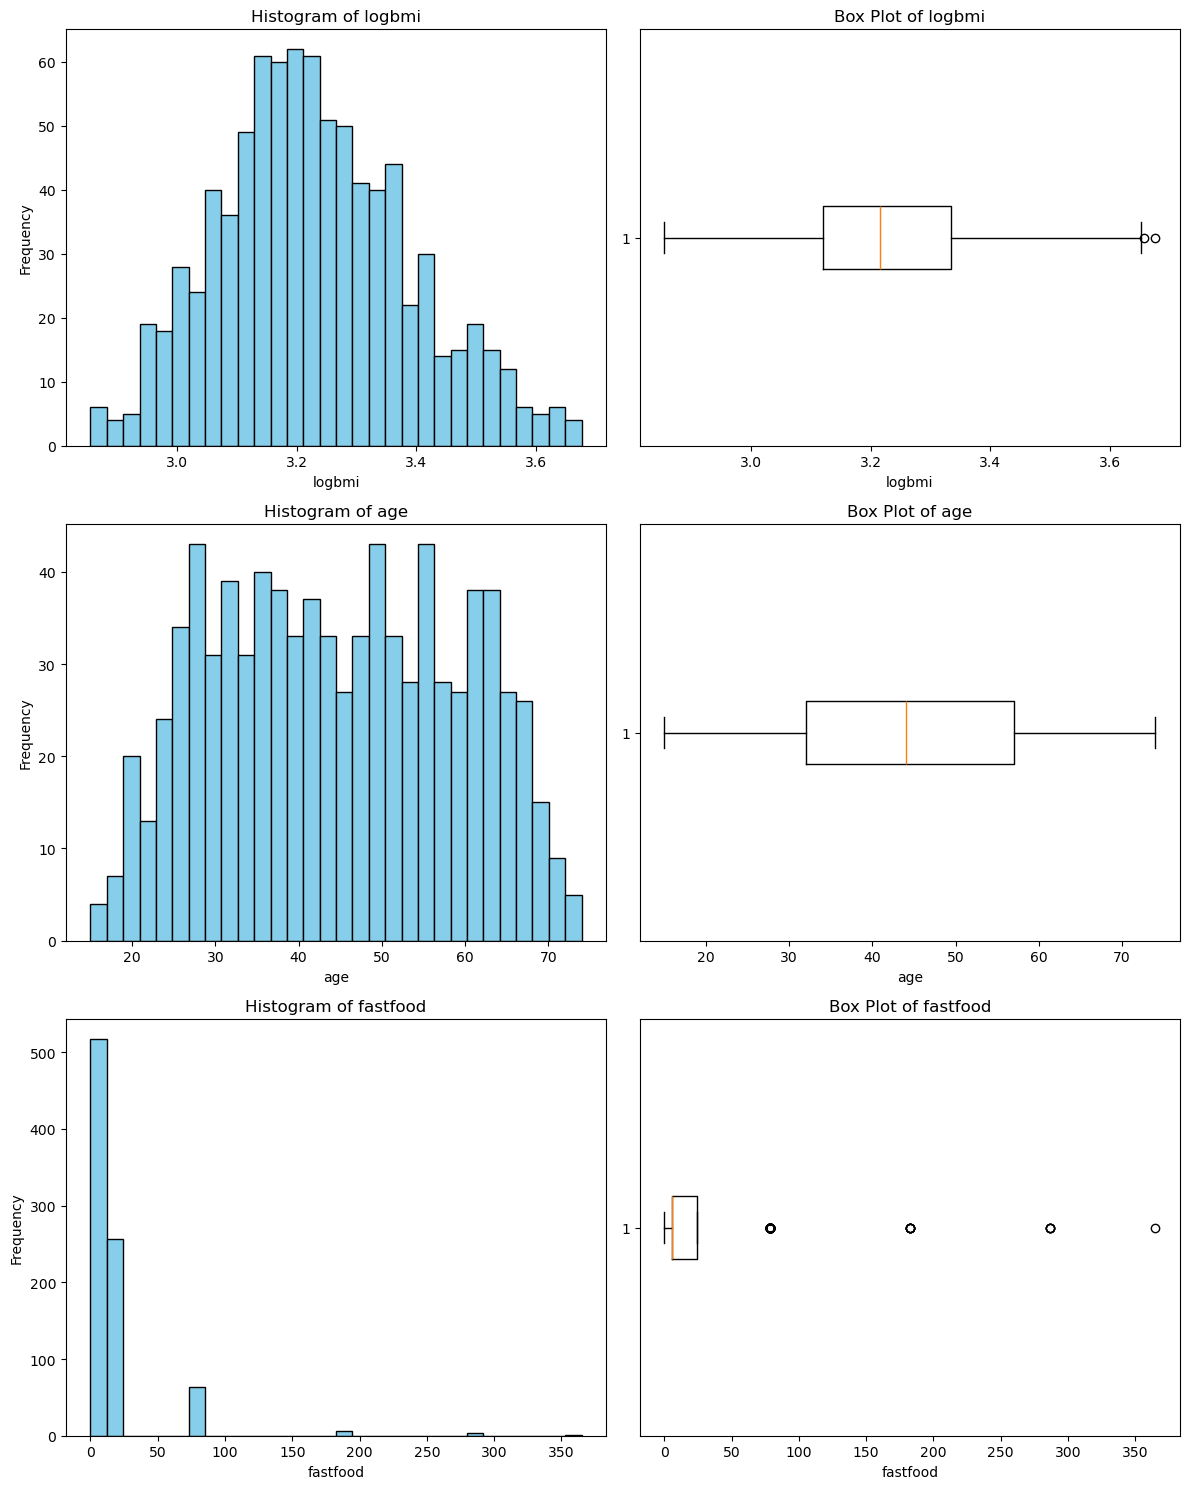

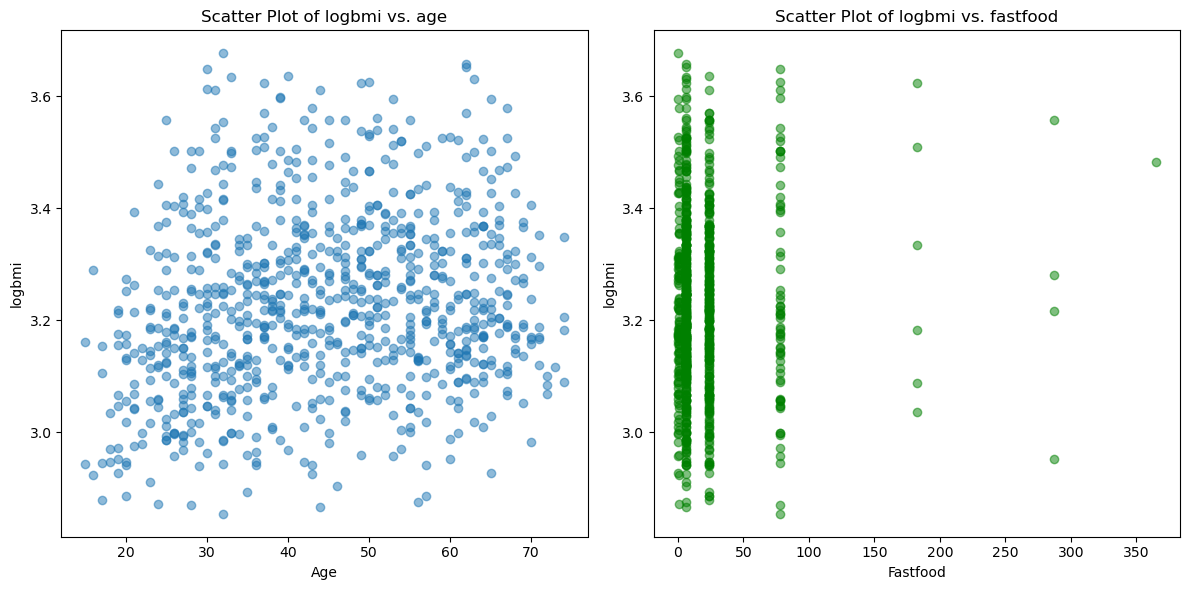

In [24]:


# Path to file (insert your own path)
file_path = 'Data/bmi2_data.csv'

# Load data
D = pd.read_csv(file_path, sep=';')
D['logbmi'] = np.log(D['bmi'])  # Add log-transformed BMI

# Summary statistics
summary_stats = D[['logbmi', 'age', 'fastfood']].describe(percentiles=[0.25, 0.75])
summary_stats = summary_stats.transpose()
summary_stats.rename(columns={'50%': 'median', '25%': '0.25 quantile', '75%': '0.75 quantile'}, inplace=True)
print(summary_stats[['count', 'mean', 'std', 'median', '0.25 quantile', '0.75 quantile']])

# Visualization setup
fig, axs = plt.subplots(3, 2, figsize=(12, 15))

# Histograms and Box Plots
variables = ['logbmi', 'age', 'fastfood']
for i, var in enumerate(variables):
    # Histogram
    axs[i, 0].hist(D[var], bins=30, color='skyblue', edgecolor='black')
    axs[i, 0].set_title(f'Histogram of {var}')
    axs[i, 0].set_xlabel(var)
    axs[i, 0].set_ylabel('Frequency')
    
    # Box Plot
    axs[i, 1].boxplot(D[var], vert=False)
    axs[i, 1].set_title(f'Box Plot of {var}')
    axs[i, 1].set_xlabel(var)

plt.tight_layout()
plt.show()

# Scatter Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(D['age'], D['logbmi'], alpha=0.5)
plt.title('Scatter Plot of logbmi vs. age')
plt.xlabel('Age')
plt.ylabel('logbmi')

plt.subplot(1, 2, 2)
plt.scatter(D['fastfood'], D['logbmi'], alpha=0.5, color='green')
plt.title('Scatter Plot of logbmi vs. fastfood')
plt.xlabel('Fastfood')
plt.ylabel('logbmi')

plt.tight_layout()
plt.show()


#### c) Fitting the model - Estimating parameters

In [25]:
# Estimate multiple linear regression model
fit = smf.ols('logbmi ~ age + fastfood', data=D_model).fit()
display(fit.summary(slim=True))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 logbmi   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.043
No. Observations:                 840   F-statistic:                     19.66
Covariance Type:            nonrobust   Prob (F-statistic):           4.53e-09
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1124      0.019    160.835      0.000       3.074       3.150
age            0.0024      0.000      6.104      0.000       0.002       0.003
fastfood       0.0005      0.000      3.119      0.002       0.000       0.001
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### d) Model validation

In [26]:
# Observations against fitted values
plt.scatter(fit.fittedvalues, D_model.logbmi)
plt.xlabel("Fitted values")
plt.ylabel("log(BMI)")
plt.show()

# Residuals against each of the explanatory variables
plt.scatter(D_model.(EXPLANATORY_VARIABLE_HERE), fit.resid)
plt.xlabel("Insert text here")
plt.ylabel("Residuals")

# Residuals against fitted values
plt.scatter(fit.fittedvalues, fit.resid)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

# Normal QQ-plot of the residuals
sm.qqplot(fit.resid, line='q')
plt.ylabel("Residuals")
plt.xlabel("Z-scores")
plt.title("")
plt.show()

SyntaxError: invalid syntax (2550085270.py, line 8)

#### e) Confidence interval

In [ ]:
# Confidence intervals for the model coefficients
fit.conf_int(alpha=0.05)

#### h) Predictions

In [ ]:
# Predictions and 95% prediction intervals
final_model = fit # Insert your final model. Must be same format as "fit"
pred = final_model.get_prediction(D_test).summary_frame(alpha=0.05)

# Reset index for D_test. So we can new dataframe with observed values and predictions
D_test.reset_index(inplace=True)

# Observed values and predictions
# New dataframe
res = pd.DataFrame({'id': D_test['id'],'logbmi': D_test['logbmi'],'pred': pred['mean'],'pred_lower': pred['obs_ci_lower'],'pred_upper':pred['obs_ci_upper']})
display(res)